In [ ]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [3]:
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [28]:
red['type'] = 0
white['type'] = 1
wine = pd.concat([red, white])

print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


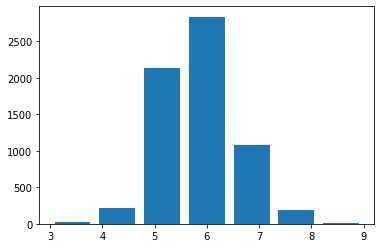

In [30]:
import matplotlib.pyplot as plt
plt.hist(wine['quality'], bins = 7, rwidth = 0.8)
plt.show()

In [31]:
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

In [6]:
# test loc
data = [['Apple', 11], ['Banana', 23], ['Coconut', 35]]
df = pd.DataFrame(data, columns = ['Fruit', 'Count'])
print(df)
print()
print(df.loc[0])
print()
print(df.loc[0, 'Fruit'])

     Fruit  Count
0    Apple     11
1   Banana     23
2  Coconut     35

Fruit    Apple
Count       11
Name: 0, dtype: object

Apple


In [32]:
import tensorflow as tf
import numpy as np

del wine['quality']
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac = 1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes = 3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes = 3)

In [34]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = 48, activation = 'relu', input_shape = (12, )),
                             tf.keras.layers.Dense(units = 24, activation = 'relu'),
                             tf.keras.layers.Dense(units = 12, activation = 'relu'),
                             tf.keras.layers.Dense(units = 3, activation = 'softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.07), loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(train_X, train_Y, epochs = 25, batch_size = 32, validation_split = 0.25)

Epoch 1/25
122/122 [==============================] - 0s 2ms/step - loss: 0.5051 - accuracy: 0.7973 - val_loss: 0.4180 - val_accuracy: 0.7500
Epoch 2/25
122/122 [==============================] - 0s 1ms/step - loss: 0.4362 - accuracy: 0.7937 - val_loss: 0.4167 - val_accuracy: 0.8254
Epoch 3/25
122/122 [==============================] - 0s 1ms/step - loss: 0.4505 - accuracy: 0.7939 - val_loss: 0.3730 - val_accuracy: 0.8315
Epoch 4/25
122/122 [==============================] - 0s 1ms/step - loss: 0.4247 - accuracy: 0.7914 - val_loss: 0.3688 - val_accuracy: 0.8338
Epoch 5/25
122/122 [==============================] - 0s 1ms/step - loss: 0.4104 - accuracy: 0.8040 - val_loss: 0.4078 - val_accuracy: 0.7777
Epoch 6/25
122/122 [==============================] - 0s 1ms/step - loss: 0.4236 - accuracy: 0.7945 - val_loss: 0.3823 - val_accuracy: 0.8254
Epoch 7/25
122/122 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.7968 - val_loss: 0.3853 - val_accuracy: 0.8254
Epoch 

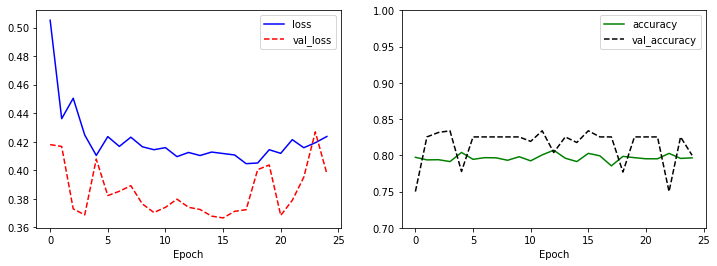

In [36]:
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [37]:
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 884us/step - loss: 0.4105 - accuracy: 0.8000


[0.41051536798477173, 0.800000011920929]